# Presentación de los Resultados


In [108]:
import os
from skimage import io
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import helper as hp

## PRUEBAS

In [179]:
PATH_PRUEBAS = "./Resultados"
pruebas = pd.read_csv(PATH_PRUEBAS+"/pruebas.csv")
pruebas

,PRUEBA,RED,EPOCH,BATCH_SIZE
0,1,FC-DenseNet56,50,1
1,2,FC-DenseNet56,70,1
2,3,Encoder-Decoder,70,1
3,4,Encoder-Decoder,70,2
4,5,Encoder-Decoder-Skip,70,1
5,6,Encoder-Decoder-Skip,70,2
6,7,FRRN-A,70,1
7,8,MobileUNet,70,1
8,9,MobileUNet,70,2
9,10,MobileUNet-Skip,70,1


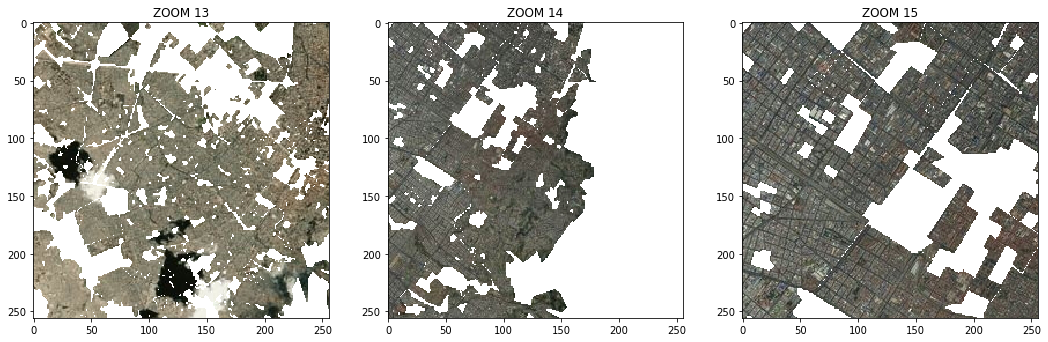

In [112]:
PATH_DATASET = "./data/dataset/OVERLAECOBO/WITHOUT BACKGROUND/OVERLAECOBO_#"

# import image
img_13_simple = io.imread(PATH_DATASET.replace("#","13")+"/SIMPLE/val/0.png")
img_14_simple = io.imread(PATH_DATASET.replace("#","14")+"/SIMPLE/val/12.png")
img_15_simple = io.imread(PATH_DATASET.replace("#","15")+"/SIMPLE/val/33.png")

hp.show_images([img_13_simple,img_14_simple,img_15_simple],titles=["ZOOM 13", "ZOOM 14", "ZOOM 15"])

## METRICA

Se uso la metrica [IoU](https://www.pyimagesearch.com/2016/11/07/intersection-over-union-iou-for-object-detection/) para calcular la similitud entre las imagenes de `Ground Truht` y `prediction`. A grandes Rasgos IoU funciona de la siguiente manera.
![iou](./Libro UIS/plantilla_latex/img/iou.png)

In [168]:
iou_all_test = pd.read_csv(PATH_PRUEBAS+"/Iou results.csv")
iou_all_test.head()

,PRUEBA,ZOOM,MODEL,BATCH_SIZE,EPOCH,MEAN_IOU,RUN_TIME
0,1,13_SIMPLE,FC-DenseNet56,1,50,0.236820,1704
1,2,13_SIMPLE,FC-DenseNet56,1,70,0.278959,1868
2,3,13_SIMPLE,Encoder-Decoder,1,70,0.115989,1919
3,4,13_SIMPLE,Encoder-Decoder,2,70,0.134592,1708
4,5,13_SIMPLE,Encoder-Decoder-Skip,1,70,0.276193,2489


## ¿Hay mejora en el IoU al hacer cambios de Resolucion?


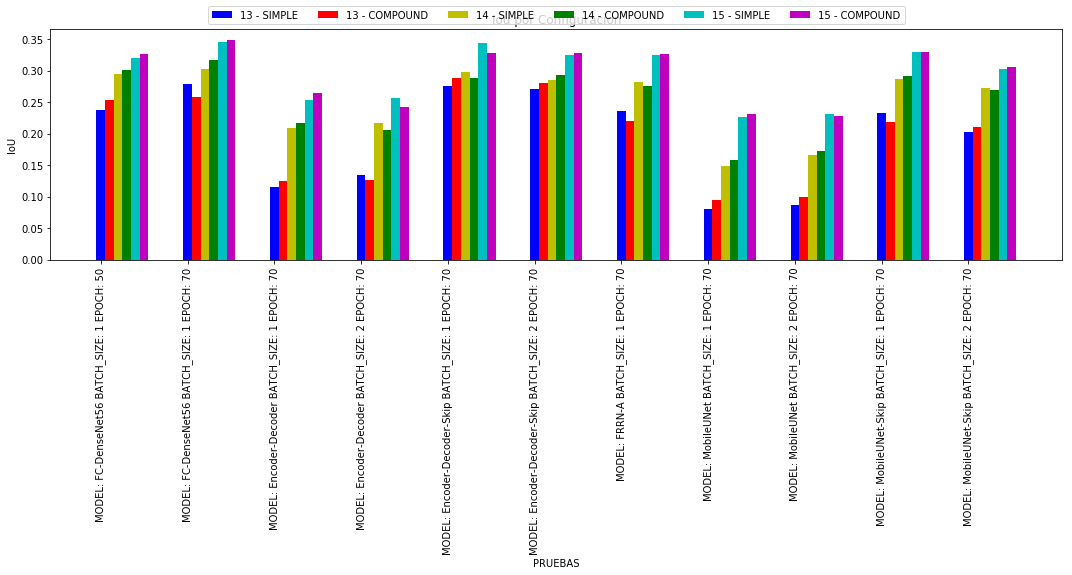

In [676]:
n_groups = 11
le = ["MODEL: "+str(i[0])+" BATCH_SIZE: "+str(i[1])+" EPOCH: "+str(i[2]) for i in iou_all_test.loc[:,["MODEL", "BATCH_SIZE","EPOCH"]].values]
means_13_simple = iou_all_test[iou_all_test["ZOOM"] == "13_SIMPLE"]["MEAN_IOU"].values.tolist()
means_13_compound = iou_all_test[iou_all_test["ZOOM"] == "13_COMPOUND"]["MEAN_IOU"].values.tolist()
means_14_simple = iou_all_test[iou_all_test["ZOOM"] == "14_SIMPLE"]["MEAN_IOU"].values.tolist()
means_14_compound = iou_all_test[iou_all_test["ZOOM"] == "14_COMPOUND"]["MEAN_IOU"].values.tolist()
means_15_simple = iou_all_test[iou_all_test["ZOOM"] == "15_SIMPLE"]["MEAN_IOU"].values.tolist()
means_15_compound = iou_all_test[iou_all_test["ZOOM"] == "15_COMPOUND"]["MEAN_IOU"].values.tolist()

# create plot
fig, ax = plt.subplots(figsize=(15,8))
index = np.arange(11)
bar_width = 0.1
opacity = 1

rects1 = plt.bar(index, means_13_simple, bar_width, alpha=opacity, color='b', label='13 - SIMPLE')
rects2 = plt.bar(index + bar_width, means_13_compound, bar_width, alpha=opacity, color='r', label='13 - COMPOUND')
rects3 = plt.bar(index + bar_width*2, means_14_simple, bar_width, alpha=opacity, color='y', label='14 - SIMPLE')
rects4 = plt.bar(index + bar_width*3, means_14_compound, bar_width, alpha=opacity, color='g', label='14 - COMPOUND')
rects5 = plt.bar(index + bar_width*4, means_15_simple, bar_width, alpha=opacity, color='c', label='15 - SIMPLE')
rects6 = plt.bar(index + bar_width*5, means_15_compound, bar_width, alpha=opacity, color='m', label='15 - COMPOUND')

plt.xlabel('PRUEBAS')
plt.ylabel('IoU')
plt.title('Iou por Configuracion')
plt.xticks(index, le ,rotation=90)


plt.tight_layout()
plt.legend(bbox_to_anchor=(0., 1., 1., .1), loc=8,
           ncol=6,)
plt.show()


In [677]:
def grafica(PRUEBA):
    n_groups = 1

    aux = pruebas[pruebas["PRUEBA"] == PRUEBA]
    table = iou_all_test[iou_all_test["MODEL"] == aux.values[0][1]][iou_all_test[iou_all_test["MODEL"] == aux.values[0][1]]["PRUEBA"] == PRUEBA]

    means = table["MEAN_IOU"].values.tolist()

    # create plot
    fig, ax = plt.subplots(figsize=(10,6))
    index = np.arange(n_groups)
    bar_width = 0.1
    opacity = 1


    rects1 = plt.bar(index, means[0], bar_width, alpha=opacity, color='b', label='13 - SIMPLE')
    rects2 = plt.bar(index + bar_width, means[1], bar_width, alpha=opacity, color='r', label='13 - COMPOUND')
    rects3 = plt.bar(index + bar_width*2, means[2], bar_width, alpha=opacity, color='y', label='14 - SIMPLE')
    rects4 = plt.bar(index + bar_width*3, means[2], bar_width, alpha=opacity, color='g', label='14 - COMPOUND')
    rects5 = plt.bar(index + bar_width*4, means[4], bar_width, alpha=opacity, color='c', label='15 - SIMPLE')
    rects6 = plt.bar(index + bar_width*5, means[5], bar_width, alpha=opacity, color='m', label='15 - COMPOUND')

    plt.legend(bbox_to_anchor=(0., 1., 1., .1), loc=8,
               ncol=6,)
    plt.xlabel(le[PRUEBA-1])
    plt.ylabel('IoU')
    plt.xticks(index+0.9,  table["ZOOM"].values.tolist(),rotation=90)


    plt.tight_layout()

    plt.show()

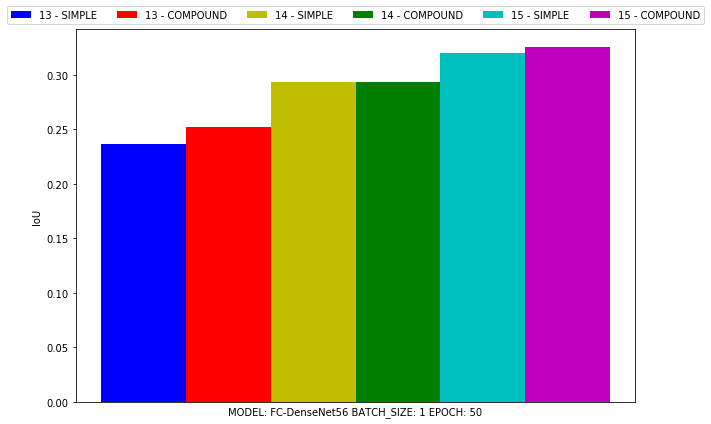

In [678]:
grafica(1)

Como se puede observar en la grafica si hay cambio al hacer, y en algunos casos hay mejoria en el uso de `COMPOUND` en comparacion son `SIMPLE`

## ¿Hay mejora en el IoU al hacer cambios de EPOCH?

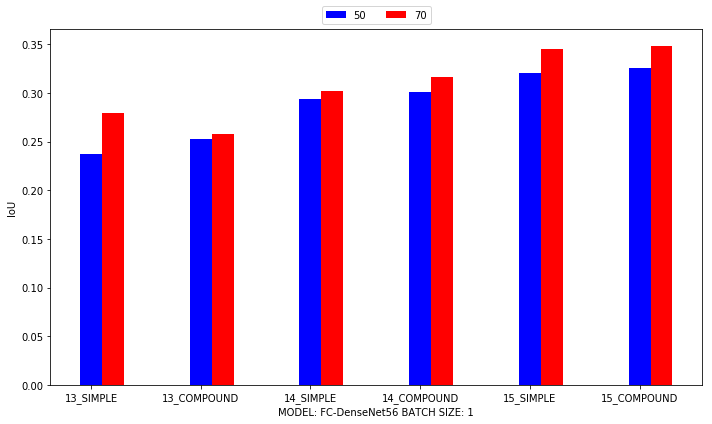

In [640]:
n_groups = 6

means_50 = iou_all_test.sort_values(by=["MODEL","ZOOM","PRUEBA"])[24:36][iou_all_test.sort_values(by=["MODEL","ZOOM","PRUEBA"])[24:36]["EPOCH"] == 50].sort_index()["MEAN_IOU"].values.tolist()
means_70 = iou_all_test.sort_values(by=["MODEL","ZOOM","PRUEBA"])[24:36][iou_all_test.sort_values(by=["MODEL","ZOOM","PRUEBA"])[24:36]["EPOCH"] == 70].sort_index()["MEAN_IOU"].values.tolist()

fig, ax = plt.subplots(figsize=(10,6))
index = np.arange(n_groups)
bar_width = 0.2
opacity = 1

rects1 = plt.bar(index, means_50, bar_width, alpha=opacity, color='b', label='50 Ep')
rects2 = plt.bar(index + bar_width, means_70, bar_width, alpha=opacity, color='r', label='70')

plt.legend(bbox_to_anchor=(0., 1., 1., .1), loc=8, ncol=6,)
plt.xlabel("MODEL: FC-DenseNet56 BATCH SIZE: 1")
plt.ylabel('IoU')
plt.xticks(index, ["13_SIMPLE","13_COMPOUND","14_SIMPLE","14_COMPOUND","15_SIMPLE","15_COMPOUND"]  )


plt.tight_layout()

plt.show()

Aunque realize pocas pruebas con distintos epoch las que hicen dicen que si hay cambios.

## PEOR MODELO

In [670]:
worst = iou_all_test.loc[iou_all_test["MEAN_IOU"].idxmin()].values[1:]
"El peor modelo es: - DATASET:{0} - MODELO: {1} - BATCh SIZE {2} - EPOCH: {3} -IOU: {4}".format(worst[0],worst[1],worst[2],worst[3],worst[4])

'El peor modelo es: - DATASET:13_SIMPLE - MODELO: MobileUNet - BATCh SIZE 1 - EPOCH: 70 -IOU: 0.07966989768315261'

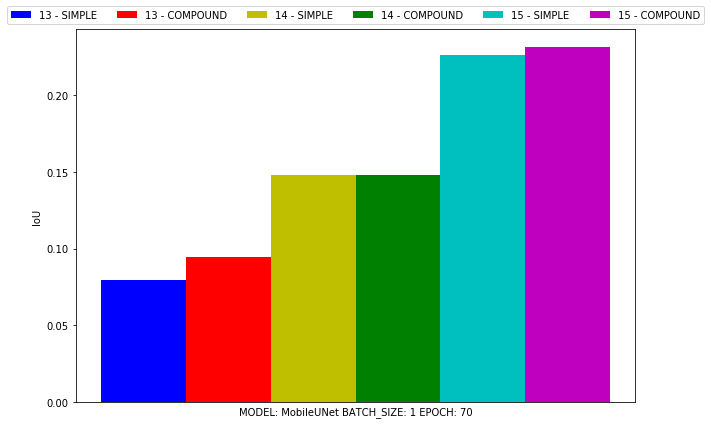

In [683]:
grafica(8)

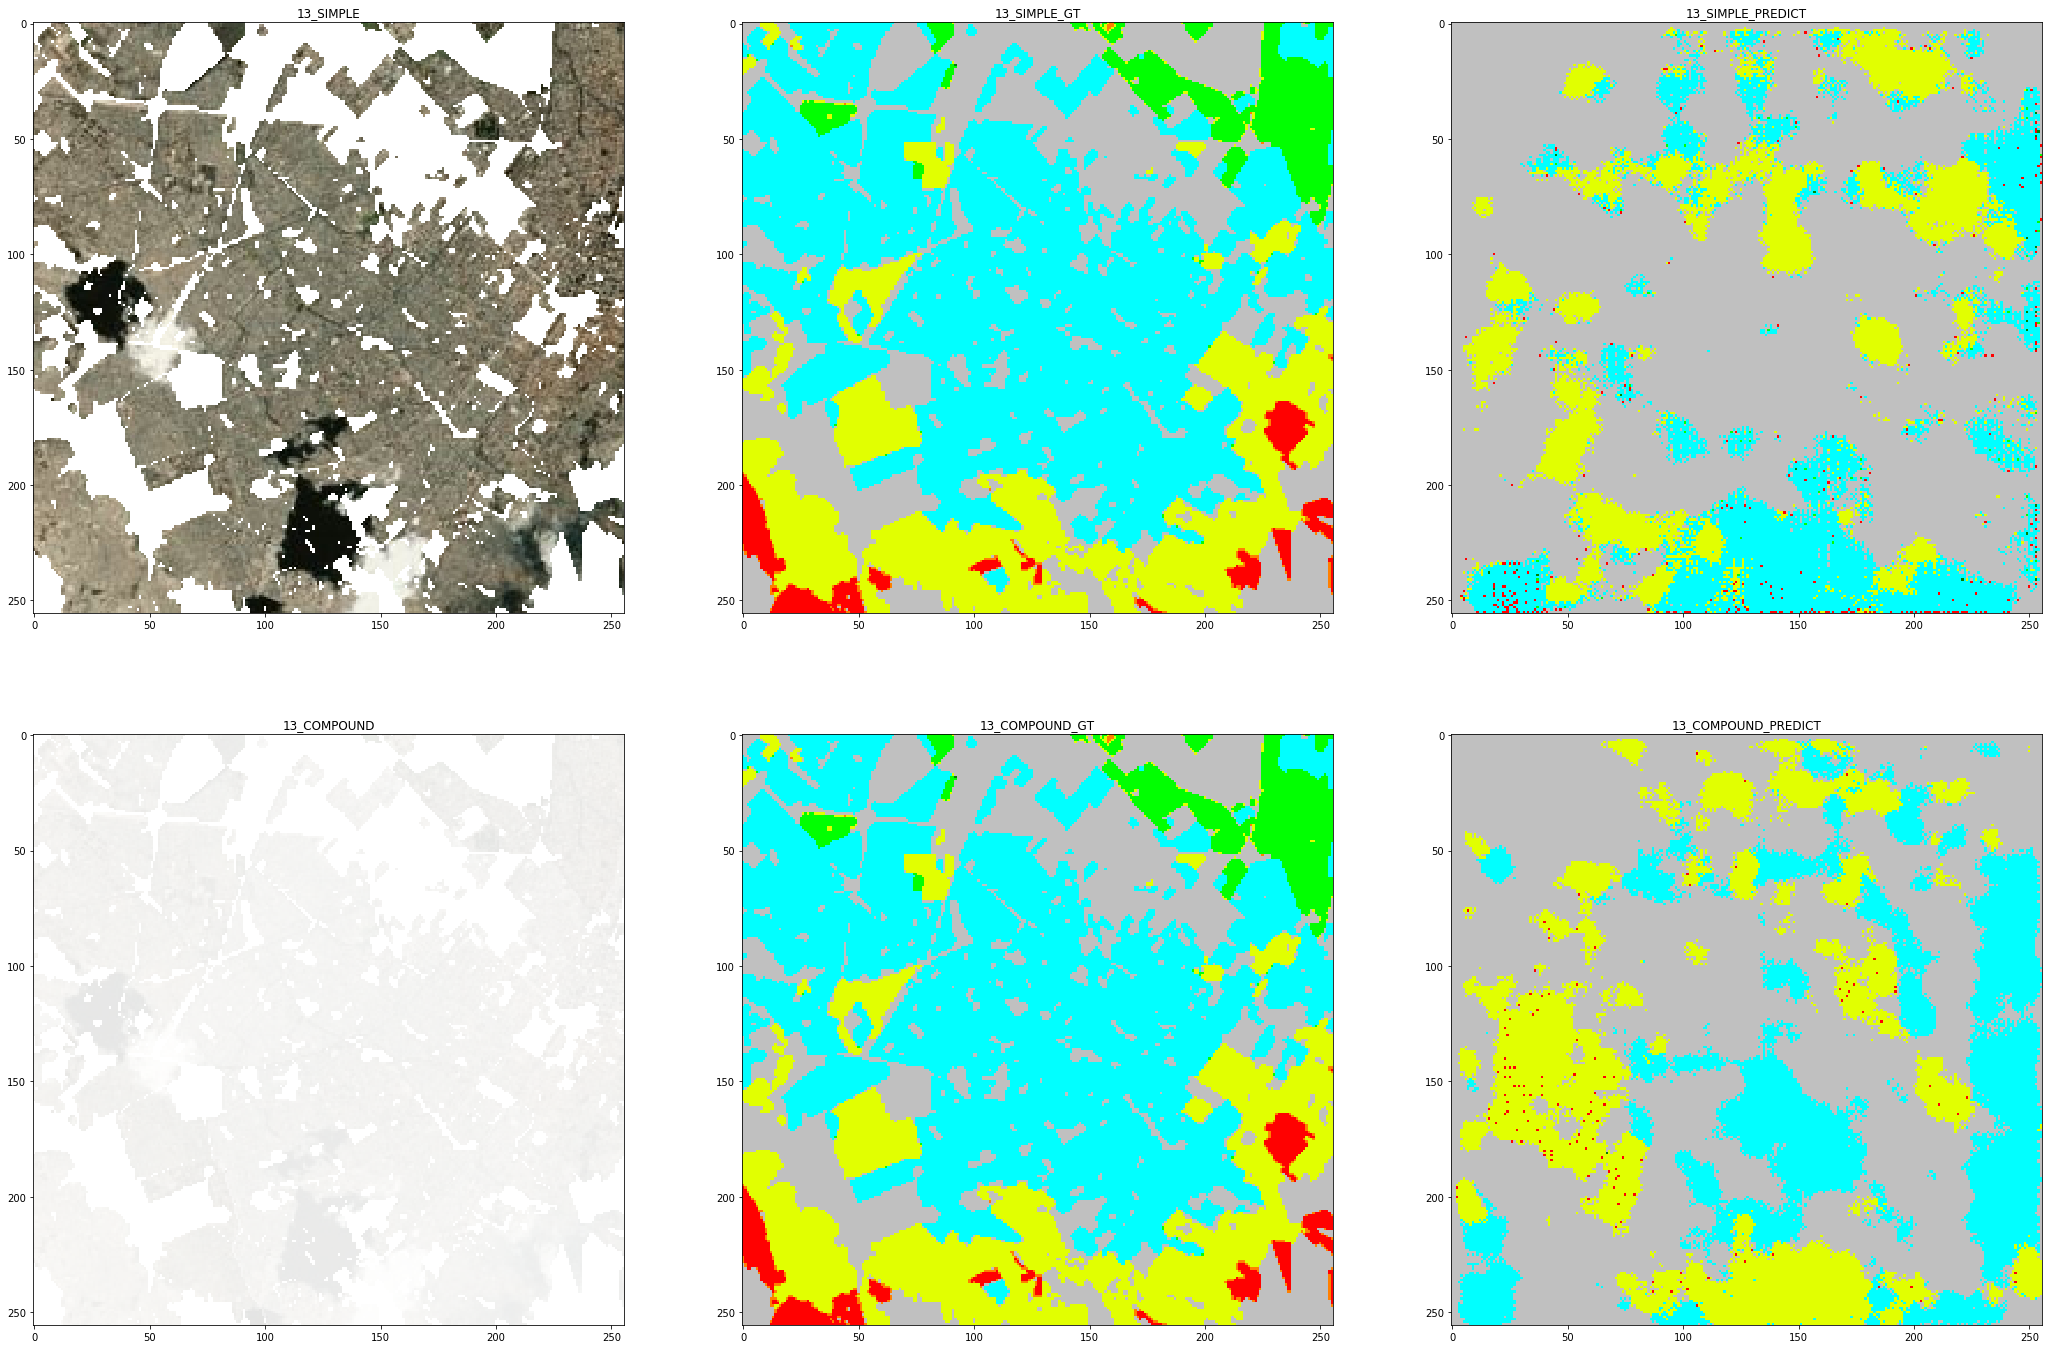

In [695]:
img_13_simple = io.imread(PATH_DATASET.replace("#","13")+"/SIMPLE/val/0.png")
img_13_simple_gt = io.imread(PATH_PRUEBAS+"/13_SIMPLE/prueba_8/Val/0_gt.png")
img_13_simple_pred = io.imread(PATH_PRUEBAS+"/13_SIMPLE/prueba_8/Val/0_pred.png")

img_13_compound = io.imread(PATH_DATASET.replace("#","13")+"/COMPOUND/val/0.png")
img_13_compound_gt = io.imread(PATH_PRUEBAS+"/13_COMPOUND/prueba_8/Val/0_gt.png")
img_13_compound_pred = io.imread(PATH_PRUEBAS+"/13_COMPOUND/prueba_8/Val/0_pred.png")

#img_14_simple = io.imread(PATH_DATASET.replace("#","14")+"/SIMPLE/val/12.png")
#img_15_simple = io.imread(PATH_DATASET.replace("#","15")+"/SIMPLE/val/33.png")

images = [img_13_simple, img_13_simple_gt, img_13_simple_pred, img_13_compound, img_13_compound_gt, img_13_compound_pred]
titles = ["13_SIMPLE", "13_SIMPLE_GT", "13_SIMPLE_PREDICT","13_COMPOUND", "13_COMPOUND_GT", "13_COMPOUND_PREDICT"]
hp.show_images(images,titles=titles,cols=2)

## MEJOR MODELO

In [682]:
best = iou_all_test.loc[iou_all_test["MEAN_IOU"].idxmax()].values[1:]
"El Mejor modelo es: - DATASET:{0} - MODELO: {1} - BATCh SIZE {2} - EPOCH: {3} -IOU: {4}".format(best[0],best[1],best[2],best[3],best[4])

'El Mejor modelo es: - DATASET:15_COMPOUND - MODELO: FC-DenseNet56 - BATCh SIZE 1 - EPOCH: 70 -IOU: 0.34783605595694456'

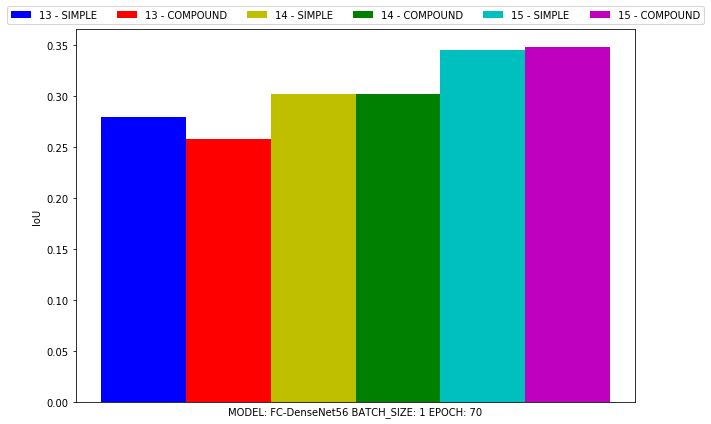

In [685]:
grafica(2)

In [ ]:


mejor y peor red por zoom

In [ ]:
imagenes de la misma zona con distinta resolucinoes (mejor y peor red en varios zoom)